<a href="https://colab.research.google.com/github/sowmya280404/data-science-projects/blob/main/EDA_PROJECT_NYKAA_HEALTH_%26_WELLNESS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [ ]:
url="https://www.nykaa.com/"

In [ ]:
page=requests.get(url)
page

<Response [200]>

In [ ]:
soup=BeautifulSoup(page.text)

In [ ]:
#multipage idea
for i in range(1,35):
    url= f'page{i}'
    print(url)

page1
page2
page3
page4
page5
page6
page7
page8
page9
page10
page11
page12
page13
page14
page15
page16
page17
page18
page19
page20
page21
page22
page23
page24
page25
page26
page27
page28
page29
page30
page31
page32
page33
page34


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize empty lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Wellness-related subcategories for detection
wellness_keywords = r"(Tablet|Capsule|Powder|Tea|Juice|Oil|Drop|Gummy|Spray|Drink|Syrup|Supplement)"

# Loop through multiple pages (adjust page range as needed)
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/shop-by-concern/c/734?page_no={i}&sort=popularity"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    product_cards = soup.find_all("div", class_="css-d5z3ro")
    if not product_cards:
        print(f"No products found on page {i}, stopping.")
        break

    for product_div in product_cards:
        text = product_div.get_text()

        # Title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Sub_Category using keywords
            category_match = re.search(wellness_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(category_match.group(1).capitalize() if category_match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand from the start of the title (first two words typically)
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP
        mrp_match = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted price and percent
        discount_match = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if discount_match:
            afterDiscountPrice.append(int(discount_match.group(1)))
            discountPercent.append(int(discount_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count (if available)
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Category
        Category.append("Wellness")

        # Bestseller tag detection
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper() else "No")

    time.sleep(1)

# Create DataFrame
df_wellness = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# Preview
print(df_wellness.head())


                                               Title        Brand  Category  \
0  Auric Liver Detox Effervescent with 10 Ayurved...  Auric Liver  Wellness   
1  OZiva Plant Based HerBalance for PCOS with Myo...  OZiva Plant  Wellness   
2  Plix Apple Cider Vinegar Effervescent Tablets ...   Plix Apple  Wellness   
3      Pee Safe Lavender Toilet Seat Sanitizer Spray     Pee Safe  Wellness   
4  Auric Liver Detox Effervescent with 10 Ayurved...  Auric Liver  Wellness   

  Sub_Category   Mrp  After_Discount_Price  Discount_Percent  Review_Counts  \
0      Unknown  2000                1680.0              16.0           28.0   
1      Unknown  1199                 109.0              98.0          895.0   
2       Tablet  1400                 999.0              29.0          488.0   
3          Oil   180                  17.0              15.0         5781.0   
4      Unknown  1500                1350.0              10.0            3.0   

  Gift Bestseller  
0   No        Yes  
1  Yes    

In [ ]:
df_wellness.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
0,Auric Liver Detox Effervescent with 10 Ayurved...,Auric Liver,Wellness,Unknown,2000,1680.0,16.0,28.0,No,Yes
1,OZiva Plant Based HerBalance for PCOS with Myo...,OZiva Plant,Wellness,Unknown,1199,109.0,98.0,895.0,Yes,Yes
2,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Wellness,Tablet,1400,999.0,29.0,488.0,Yes,Yes
3,Pee Safe Lavender Toilet Seat Sanitizer Spray,Pee Safe,Wellness,Oil,180,17.0,15.0,5781.0,Yes,Yes
4,Auric Liver Detox Effervescent with 10 Ayurved...,Auric Liver,Wellness,Unknown,1500,1350.0,10.0,3.0,No,Yes


In [ ]:
df_wellness.drop(df_wellness[df_wellness['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_wellness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 2 to 659
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 346 non-null    object 
 1   Brand                 329 non-null    object 
 2   Category              346 non-null    object 
 3   Sub_Category          346 non-null    object 
 4   Mrp                   346 non-null    int64  
 5   After_Discount_Price  232 non-null    float64
 6   Discount_Percent      232 non-null    float64
 7   Review_Counts         257 non-null    float64
 8   Gift                  346 non-null    object 
 9   Bestseller            346 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 29.7+ KB


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Keywords to infer sub-category
supplement_keywords = r"(Capsule|Tablet|Powder|Gummy|Drink|Juice|Shot|Strip|Oil|Tea|Drop|Liquid)"

# Loop through multiple pages
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/beauty-supplements/c/18546?page_no={i}&sort=popularity"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    product_cards = soup.find_all("div", class_="css-d5z3ro")
    if not product_cards:
        print(f"No products on page {i}, stopping.")
        break

    for product_div in product_cards:
        text = product_div.get_text()

        # Title
        title_tag = product_div.find("div", class_='css-xrzmfa')
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)

            # Subcategory from keywords
            match = re.search(supplement_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(match.group(1).capitalize() if match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand from first two words
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP extraction
        mrp_match = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted price and percent
        discount_match = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if discount_match:
            afterDiscountPrice.append(int(discount_match.group(1)))
            discountPercent.append(int(discount_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Reviews
        review_tag = product_div.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.get_text())
            reviewCounts.append(int(review_match.group(0)) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Gift info
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Set category
        Category.append("Beauty Supplements")

        # Bestseller tag
        bestseller_tag = product_div.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper() else "No")

    time.sleep(1)

# Convert to DataFrame
df_beauty_supplements = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# Preview
print(df_beauty_supplements.head())


                                               Title             Brand  \
0  HealthKart Hk Vitals Skin Radiance Collagen Su...     HealthKart Hk   
1  Plix Glutathione Skin Glow 45 Effervescent Tab...  Plix Glutathione   
2  OZiva Bioactive Gluta Fizzy (L-Glutathione), R...   OZiva Bioactive   
3  Be Bodywise Biotin Hair Gummies - Zinc, Fibre,...       Be Bodywise   
4  Beautywise Hair Rescue Biotin & Keratin Hair A...   Beautywise Hair   

             Category Sub_Category   Mrp  After_Discount_Price  \
0  Beauty Supplements      Unknown  1899                1649.0   
1  Beauty Supplements       Tablet  1950                1225.0   
2  Beauty Supplements      Unknown  4796                2999.0   
3  Beauty Supplements      Unknown   899                  84.0   
4  Beauty Supplements      Unknown  1599                1039.0   

   Discount_Percent  Review_Counts Gift Bestseller  
0              13.0         3285.0   No        Yes  
1              37.0          944.0  Yes        Yes  

In [ ]:
df_beauty_supplements.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
0,HealthKart Hk Vitals Skin Radiance Collagen Su...,HealthKart Hk,Beauty Supplements,Unknown,1899,1649.0,13.0,3285.0,No,Yes
1,Plix Glutathione Skin Glow 45 Effervescent Tab...,Plix Glutathione,Beauty Supplements,Tablet,1950,1225.0,37.0,944.0,Yes,Yes
2,"OZiva Bioactive Gluta Fizzy (L-Glutathione), R...",OZiva Bioactive,Beauty Supplements,Unknown,4796,2999.0,37.0,715.0,Yes,Yes
3,"Be Bodywise Biotin Hair Gummies - Zinc, Fibre,...",Be Bodywise,Beauty Supplements,Unknown,899,84.0,96.0,4416.0,Yes,Yes
4,Beautywise Hair Rescue Biotin & Keratin Hair A...,Beautywise Hair,Beauty Supplements,Unknown,1599,1039.0,35.0,348.0,No,No


In [ ]:
df_beauty_supplements.drop(df_beauty_supplements[df_beauty_supplements['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_beauty_supplements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 1 to 658
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 224 non-null    object 
 1   Brand                 218 non-null    object 
 2   Category              224 non-null    object 
 3   Sub_Category          224 non-null    object 
 4   Mrp                   224 non-null    int64  
 5   After_Discount_Price  156 non-null    float64
 6   Discount_Percent      156 non-null    float64
 7   Review_Counts         170 non-null    float64
 8   Gift                  224 non-null    object 
 9   Bestseller            224 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 19.2+ KB


In [ ]:
df_beauty_supplements.isnull().sum()

,0
Title,0
Brand,6
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,68
Discount_Percent,68
Review_Counts,54
Gift,0
Bestseller,0


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize data storage lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Keywords to help identify sub-categories
health_keywords = r"(Capsule|Tablet|Powder|Gummy|Drink|Juice|Shot|Oil|Tea|Drop|Liquid|Protein|Formula|Mix)"

# Loop through pages 1–20 (adjust as needed)
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/health-supplements/c/18540?page_no={i}&sort=popularity"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    product_divs = soup.find_all("div", class_="css-d5z3ro")
    if not product_divs:
        print(f"No products found on page {i}, stopping.")
        break

    for div in product_divs:
        text = div.get_text()

        # Title
        title_tag = div.find("div", class_="css-xrzmfa")
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)
            # Sub-category detection via keywords
            match = re.search(health_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(match.group(1).capitalize() if match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP extraction
        mrp_match = re.search(r"MRP:₹(\d+)", text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted price & percentage
        disc_match = re.search(r"₹(\d+?)(\d{2})% Off", text)
        if disc_match:
            afterDiscountPrice.append(int(disc_match.group(1)))
            discountPercent.append(int(disc_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review counts
        rev_tag = div.find("span", class_="css-1qbvrhp")
        if rev_tag:
            rev_num = re.search(r"\d+", rev_tag.get_text())
            reviewCounts.append(int(rev_num.group()) if rev_num else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Category
        Category.append("Health Supplements")

        # Bestseller detection
        bs = div.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bs and "BESTSELLER" in bs.text.upper() else "No")

    time.sleep(1)

# Create DataFrame
df_health_supplements = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# View DataFrame preview
print(df_health_supplements.head())


                                               Title                Brand  \
0            Isopure Zero Carb Protein (Unflavoured)         Isopure Zero   
1  Plix Apple Cider Vinegar Effervescent Tablets ...           Plix Apple   
2  OZiva Bioactive Gluta Fizzy (L-Glutathione), R...      OZiva Bioactive   
3  Plix Apple Cider Vinegar Effervescent Tablets ...           Plix Apple   
4  Wellbeing Nutrition Slow Triple Magnesium Comp...  Wellbeing Nutrition   

             Category Sub_Category   Mrp  After_Discount_Price  \
0  Health Supplements      Protein  5949                5057.0   
1  Health Supplements       Tablet  2100                1399.0   
2  Health Supplements      Unknown  1199                 109.0   
3  Health Supplements       Tablet  1400                 999.0   
4  Health Supplements      Unknown  1499                 142.0   

   Discount_Percent  Review_Counts Gift Bestseller  
0              15.0            9.0   No         No  
1              33.0          859.0

In [ ]:
df_health_supplements.drop(df_health_supplements[df_health_supplements['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_health_supplements.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
0,Isopure Zero Carb Protein (Unflavoured),Isopure Zero,Health Supplements,Protein,5949,5057.0,15.0,9.0,No,No
1,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Health Supplements,Tablet,2100,1399.0,33.0,859.0,Yes,Yes
3,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Health Supplements,Tablet,1400,999.0,29.0,3321.0,Yes,Yes
6,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Health Supplements,Tablet,700,549.0,22.0,2306.0,Yes,Yes
8,"Neuherbs Deep Sea Fish Oil for Muscle, Joints,...",Neuherbs Deep,Health Supplements,Oil,1099,699.0,36.0,290.0,No,Yes


In [ ]:
df_health_supplements.isnull().sum()

,0
Title,0
Brand,15
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,53
Discount_Percent,53
Review_Counts,49
Gift,0
Bestseller,0


In [ ]:
df_health_supplements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 656
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 292 non-null    object 
 1   Brand                 277 non-null    object 
 2   Category              292 non-null    object 
 3   Sub_Category          292 non-null    object 
 4   Mrp                   292 non-null    int64  
 5   After_Discount_Price  239 non-null    float64
 6   Discount_Percent      239 non-null    float64
 7   Review_Counts         243 non-null    float64
 8   Gift                  292 non-null    object 
 9   Bestseller            292 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 25.1+ KB


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Subcategory keywords to match within titles
sports_keywords = r"(Whey|Protein|Isolate|Gainer|Creatine|BCAA|Amino|Bar|Energy|Mass|Shake|Drink|Powder|Capsule|Tablet|Gummy)"

# Loop through first 20 pages (adjust if needed)
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/sports-nutrition/c/18696?page_no={i}&sort=popularity"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    product_cards = soup.find_all("div", class_="css-d5z3ro")
    if not product_cards:
        print(f"No products found on page {i}, stopping.")
        break

    for product in product_cards:
        text = product.get_text()

        # Title
        title_tag = product.find("div", class_="css-xrzmfa")
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)
            sub_match = re.search(sports_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(sub_match.group(1).capitalize() if sub_match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand extraction
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP
        mrp_match = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted price and percent
        discount_match = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if discount_match:
            afterDiscountPrice.append(int(discount_match.group(1)))
            discountPercent.append(int(discount_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.text)
            reviewCounts.append(int(review_match.group()) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Gift info
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Category
        Category.append("Sports Nutrition")

        # Bestseller detection
        bestseller_tag = product.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper() else "No")

    time.sleep(1)

# Create DataFrame
df_sports_nutrition = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# Preview result
print(df_sports_nutrition.head())


                                               Title                Brand  \
0  Isopure 100% Whey Isolate Protein - Creamy Van...                  NaN   
1  Optimum Nutrition (ON) Gold Standard 100% Whey...    Optimum Nutrition   
2  OZiva Protein & Herbs Women(with Shatavari, Gi...        OZiva Protein   
3  MuscleBlaze Biozyme Performance Whey Protein -...  MuscleBlaze Biozyme   
4  Oziva Protein & Herbs, Women - Vanilla Almond ...        Oziva Protein   

           Category Sub_Category   Mrp  After_Discount_Price  \
0  Sports Nutrition         Whey  5949                 567.0   
1  Sports Nutrition         Whey  9299                7884.0   
2  Sports Nutrition      Protein  3199                 299.0   
3  Sports Nutrition         Whey  6299                5499.0   
4  Sports Nutrition      Protein  3698                3106.0   

   Discount_Percent  Review_Counts Gift Bestseller  
0              75.0           19.0   No         No  
1              15.0          872.0   No       

In [ ]:
df_sports_nutrition.drop(df_sports_nutrition[df_sports_nutrition['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_sports_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 659
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 566 non-null    object 
 1   Brand                 552 non-null    object 
 2   Category              566 non-null    object 
 3   Sub_Category          566 non-null    object 
 4   Mrp                   566 non-null    int64  
 5   After_Discount_Price  510 non-null    float64
 6   Discount_Percent      510 non-null    float64
 7   Review_Counts         387 non-null    float64
 8   Gift                  566 non-null    object 
 9   Bestseller            566 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 48.6+ KB


In [ ]:
df_sports_nutrition.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
0,Isopure 100% Whey Isolate Protein - Creamy Van...,NaN,Sports Nutrition,Whey,5949,567.0,75.0,19.0,No,No
1,Optimum Nutrition (ON) Gold Standard 100% Whey...,Optimum Nutrition,Sports Nutrition,Whey,9299,7884.0,15.0,872.0,No,Yes
2,"OZiva Protein & Herbs Women(with Shatavari, Gi...",OZiva Protein,Sports Nutrition,Protein,3199,299.0,96.0,484.0,Yes,Yes
3,MuscleBlaze Biozyme Performance Whey Protein -...,MuscleBlaze Biozyme,Sports Nutrition,Whey,6299,5499.0,13.0,364.0,No,Yes
4,"Oziva Protein & Herbs, Women - Vanilla Almond ...",Oziva Protein,Sports Nutrition,Protein,3698,3106.0,16.0,6.0,Yes,Yes


In [ ]:
df_sports_nutrition.isnull().sum()

,0
Title,0
Brand,14
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,56
Discount_Percent,56
Review_Counts,179
Gift,0
Bestseller,0


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Keywords to identify sub-category types in health food
food_keywords = r"(Snack|Bar|Mix|Granola|Seed|Oats|Cereal|Butter|Honey|Spread|Juice|Tea|Coffee|Milk|Drink|Powder|Choco|Almond|Keto|Muesli|Protein)"

# Loop through multiple pages
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/health-foods/c/18557?page_no={i}&sort=popularity"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    product_cards = soup.find_all("div", class_="css-d5z3ro")
    if not product_cards:
        print(f"No products found on page {i}, stopping.")
        break

    for product in product_cards:
        text = product.get_text()

        # Title
        title_tag = product.find("div", class_="css-xrzmfa")
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)
            sub_match = re.search(food_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(sub_match.group(1).capitalize() if sub_match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP
        mrp_match = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted price and %
        discount_match = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if discount_match:
            afterDiscountPrice.append(int(discount_match.group(1)))
            discountPercent.append(int(discount_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review count
        review_tag = product.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.text)
            reviewCounts.append(int(review_match.group()) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Gift availability
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Category tag
        Category.append("Health Foods")

        # Bestseller
        bestseller_tag = product.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper() else "No")

    time.sleep(1)

# Create DataFrame
df_health_foods = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# Preview
print(df_health_foods.head())


                                               Title             Brand  \
0  Auric Liver Detox Effervescent with 10 Ayurved...       Auric Liver   
1  Kapiva Virgin Coconut Oil (Cold Pressed) 100% ...     Kapiva Virgin   
2         Krishna's Herbal & Ayurveda She Care Juice  Krishna's Herbal   
3  Kapiva Virgin Coconut Oil (Cold Pressed) 100% ...     Kapiva Virgin   
4  Auric Lung Detox for Smokers with Natural Blen...        Auric Lung   

       Category Sub_Category   Mrp  After_Discount_Price  Discount_Percent  \
0  Health Foods      Unknown  1500                1350.0              10.0   
1  Health Foods      Unknown   279                 240.0              14.0   
2  Health Foods        Juice   580                   NaN               NaN   
3  Health Foods      Unknown   499                   NaN               NaN   
4  Health Foods      Unknown  2400                1008.0              58.0   

   Review_Counts Gift Bestseller  
0            3.0   No        Yes  
1         1311.0

In [ ]:
df_health_foods.drop(df_health_foods[df_health_foods['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_health_foods.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
2,Krishna's Herbal & Ayurveda She Care Juice,Krishna's Herbal,Health Foods,Juice,580,NaN,NaN,298.0,No,Yes
10,Nat Habit 100% Pure Cold Pressed White Sesame ...,Nat Habit,Health Foods,Seed,377,264.0,30.0,194.0,No,No
11,PLIX Tender Coconut Water Premix Powder for an...,PLIX Tender,Health Foods,Mix,375,270.0,28.0,217.0,Yes,Yes
13,Baidyanath Rogan Badam Shireen Almond Oil,Baidyanath Rogan,Health Foods,Almond,115,101.0,12.0,1386.0,No,No
14,"The Good Bug Good To Glow SuperGut Powder, Ski...",The Good,Health Foods,Powder,699,65.0,96.0,101.0,No,Yes


In [ ]:
df_health_foods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 2 to 659
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 498 non-null    object 
 1   Brand                 493 non-null    object 
 2   Category              498 non-null    object 
 3   Sub_Category          498 non-null    object 
 4   Mrp                   498 non-null    int64  
 5   After_Discount_Price  215 non-null    float64
 6   Discount_Percent      215 non-null    float64
 7   Review_Counts         366 non-null    float64
 8   Gift                  498 non-null    object 
 9   Bestseller            498 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 42.8+ KB


In [ ]:
df_health_foods.isnull().sum()

,0
Title,0
Brand,5
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,283
Discount_Percent,283
Review_Counts,132
Gift,0
Bestseller,0


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import time

# Initialize lists
title = []
Brand = []
Category = []
Sub_Category = []
Mrp = []
afterDiscountPrice = []
discountPercent = []
reviewCounts = []
Gift = []
Bestseller = []

# Subcategory keywords for Ayurveda/Herbs
herb_keywords = r"(Ashwagandha|Giloy|Tulsi|Neem|Amla|Turmeric|Triphala|Chyawanprash|Powder|Tablet|Juice|Capsule|Syrup|Drop|Tea|Oil|Guggul|Herbal)"

# Loop through multiple pages
for i in range(1, 34):
    url = f"https://www.nykaa.com/wellness/ayurveda-herbs/c/18568?page_no={i}&sort=popularity"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    product_cards = soup.find_all("div", class_="css-d5z3ro")
    if not product_cards:
        print(f"No products found on page {i}, stopping.")
        break

    for product in product_cards:
        text = product.get_text()

        # Title
        title_tag = product.find("div", class_="css-xrzmfa")
        if title_tag:
            full_title = title_tag.text.strip()
            title.append(full_title)
            sub_match = re.search(herb_keywords, full_title, re.IGNORECASE)
            Sub_Category.append(sub_match.group(1).capitalize() if sub_match else "Unknown")
        else:
            title.append(np.nan)
            Sub_Category.append("Unknown")

        # Brand
        brand_match = re.findall(r"^[A-Za-z'’éÉ]+\s+[A-Za-z]+", full_title)
        Brand.append(brand_match[0] if brand_match else np.nan)

        # MRP
        mrp_match = re.search(r'MRP:₹(\d+)', text)
        Mrp.append(int(mrp_match.group(1)) if mrp_match else np.nan)

        # Discounted Price & % Off
        discount_match = re.search(r'₹(\d+?)(\d{2})% Off', text)
        if discount_match:
            afterDiscountPrice.append(int(discount_match.group(1)))
            discountPercent.append(int(discount_match.group(2)))
        else:
            afterDiscountPrice.append(np.nan)
            discountPercent.append(np.nan)

        # Review Count
        review_tag = product.find("span", class_="css-1qbvrhp")
        if review_tag:
            review_match = re.search(r'\d+', review_tag.text)
            reviewCounts.append(int(review_match.group()) if review_match else np.nan)
        else:
            reviewCounts.append(np.nan)

        # Complimentary Gift
        Gift.append("Yes" if "Complimentary Gift" in text else "No")

        # Category
        Category.append("Ayurveda & Herbs")

        # Bestseller
        bestseller_tag = product.find("div", class_="css-wkluxr")
        Bestseller.append("Yes" if bestseller_tag and "BESTSELLER" in bestseller_tag.text.upper() else "No")

    time.sleep(1)

# Create DataFrame
df_ayurveda = pd.DataFrame({
    "Title": title,
    "Brand": Brand,
    "Category": Category,
    "Sub_Category": Sub_Category,
    "Mrp": Mrp,
    "After_Discount_Price": afterDiscountPrice,
    "Discount_Percent": discountPercent,
    "Review_Counts": reviewCounts,
    "Gift": Gift,
    "Bestseller": Bestseller
})

# Preview
print(df_ayurveda.head())


No products found on page 10, stopping.
                                               Title                Brand  \
0  Upakarma Ayurveda Premium Ayurvedic Pure And N...    Upakarma Ayurveda   
1  OZiva Plant Based HerBalance for PCOS with Myo...          OZiva Plant   
2    Oziva Plant Based Collagen Builder - Watermelon          Oziva Plant   
3         Krishna's Herbal & Ayurveda She Care Juice     Krishna's Herbal   
4  Wellbeing Nutrition Melts Pure Ashwagandha KSM...  Wellbeing Nutrition   

           Category Sub_Category   Mrp  After_Discount_Price  \
0  Ayurveda & Herbs      Unknown  2100                1099.0   
1  Ayurveda & Herbs       Herbal  1199                 109.0   
2  Ayurveda & Herbs      Unknown   999                 899.0   
3  Ayurveda & Herbs       Herbal   580                   NaN   
4  Ayurveda & Herbs  Ashwagandha   649                 519.0   

   Discount_Percent  Review_Counts Gift Bestseller  
0              48.0           13.0   No        Yes  
1     

In [ ]:
df_ayurveda.drop(df_ayurveda[df_ayurveda['Sub_Category'] == 'Unknown'].index, inplace=True)

In [ ]:
df_ayurveda.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
1,OZiva Plant Based HerBalance for PCOS with Myo...,OZiva Plant,Ayurveda & Herbs,Herbal,1199,109.0,98.0,895.0,Yes,Yes
3,Krishna's Herbal & Ayurveda She Care Juice,Krishna's Herbal,Ayurveda & Herbs,Herbal,580,NaN,NaN,298.0,No,Yes
4,Wellbeing Nutrition Melts Pure Ashwagandha KSM...,Wellbeing Nutrition,Ayurveda & Herbs,Ashwagandha,649,519.0,20.0,1.0,Yes,Yes
6,Kapiva Wild Amla Juice (Cold Pressed)Suitable ...,Kapiva Wild,Ayurveda & Herbs,Amla,299,NaN,NaN,946.0,No,Yes
7,Neuherbs Organic Moringa Powder for Holistic W...,Neuherbs Organic,Ayurveda & Herbs,Powder,349,249.0,29.0,225.0,No,Yes


In [ ]:
df_ayurveda.isnull().sum()

,0
Title,0
Brand,3
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,44
Discount_Percent,44
Review_Counts,13
Gift,0
Bestseller,0


In [ ]:
df_ayurveda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 115 non-null    object 
 1   Brand                 112 non-null    object 
 2   Category              115 non-null    object 
 3   Sub_Category          115 non-null    object 
 4   Mrp                   115 non-null    int64  
 5   After_Discount_Price  71 non-null     float64
 6   Discount_Percent      71 non-null     float64
 7   Review_Counts         102 non-null    float64
 8   Gift                  115 non-null    object 
 9   Bestseller            115 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 9.9+ KB


In [ ]:
df = pd.concat([df_wellness, df_beauty_supplements, df_health_supplements, df_sports_nutrition,df_health_foods,df_ayurveda], axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2041 entries, 2 to 179
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 2041 non-null   object 
 1   Brand                 1981 non-null   object 
 2   Category              2041 non-null   object 
 3   Sub_Category          2041 non-null   object 
 4   Mrp                   2041 non-null   int64  
 5   After_Discount_Price  1423 non-null   float64
 6   Discount_Percent      1423 non-null   float64
 7   Review_Counts         1525 non-null   float64
 8   Gift                  2041 non-null   object 
 9   Bestseller            2041 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 175.4+ KB


In [ ]:
df.isnull().sum()

,0
Title,0
Brand,60
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,618
Discount_Percent,618
Review_Counts,516
Gift,0
Bestseller,0


In [ ]:
df["Brand"]=df["Brand"].fillna(method="bfill")

/tmp/ipython-input-38-2535646075.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Brand"]=df["Brand"].fillna(method="bfill")


In [ ]:
df["Brand"]=df["Brand"].fillna(method="ffill")

/tmp/ipython-input-39-3545570495.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Brand"]=df["Brand"].fillna(method="ffill")


In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,618
Discount_Percent,618
Review_Counts,516
Gift,0
Bestseller,0


In [ ]:
df["After_Discount_Price"]=df["After_Discount_Price"].fillna(df["Mrp"])

In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,0
Discount_Percent,618
Review_Counts,516
Gift,0
Bestseller,0


In [ ]:
df["Discount_Percent"]=df["Discount_Percent"].fillna("0")

In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,0
Discount_Percent,0
Review_Counts,516
Gift,0
Bestseller,0


In [ ]:
df["Review_Counts"]=df["Review_Counts"].fillna(method="bfill")

/tmp/ipython-input-45-619881976.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Review_Counts"]=df["Review_Counts"].fillna(method="bfill")


In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,0
Discount_Percent,0
Review_Counts,0
Gift,0
Bestseller,0


In [ ]:
df["Review_Counts"]=df["Review_Counts"].fillna(method="ffill")

/tmp/ipython-input-47-259557828.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Review_Counts"]=df["Review_Counts"].fillna(method="ffill")


In [ ]:
df.isnull().sum()

,0
Title,0
Brand,0
Category,0
Sub_Category,0
Mrp,0
After_Discount_Price,0
Discount_Percent,0
Review_Counts,0
Gift,0
Bestseller,0


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
0,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Wellness,Tablet,1400,999.0,29.0,488.0,Yes,Yes
1,Pee Safe Lavender Toilet Seat Sanitizer Spray,Pee Safe,Wellness,Oil,180,17.0,15.0,5781.0,Yes,Yes
2,"Neuherbs Deep Sea Fish Oil for Muscle, Joints,...",Neuherbs Deep,Wellness,Oil,1099,699.0,36.0,290.0,No,Yes
3,Plix Apple Cider Vinegar Effervescent Tablet w...,Plix Apple,Wellness,Tablet,350,299.0,15.0,208.0,Yes,Yes
4,Centrum Women Multivitamin Tablets,Centrum Women,Wellness,Tablet,770,693.0,10.0,19.0,No,Yes


In [ ]:
df.tail()

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller
2036,Dr. Vaidya's Herboslim Tablet - Pack Of 2,Wild Oak,Ayurveda & Herbs,Tablet,500,350.0,30.0,3.0,No,No
2037,Wild Oak Shilajit With Ashwagandha & Korean Gi...,Wild Oak,Ayurveda & Herbs,Ashwagandha,899,548.0,39.0,1.0,No,No
2038,Bold Care L-Arginine Effervescent Tablets For ...,Bold Care,Ayurveda & Herbs,Tablet,599,349.0,42.0,3.0,No,No
2039,Baidyanath Mahanarayan Body Pain Oil - Pack Of 2,Baidyanath Mahanarayan,Ayurveda & Herbs,Oil,190,17.0,29.0,22.0,No,No
2040,MyFitFuel Natural Vitamin C Amla Extract + Zin...,MyFitFuel Natural,Ayurveda & Herbs,Amla,515,379.0,26.0,18.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 2041 non-null   object 
 1   Brand                 2041 non-null   object 
 2   Category              2041 non-null   object 
 3   Sub_Category          2041 non-null   object 
 4   Mrp                   2041 non-null   int64  
 5   After_Discount_Price  2041 non-null   float64
 6   Discount_Percent      2041 non-null   object 
 7   Review_Counts         2041 non-null   float64
 8   Gift                  2041 non-null   object 
 9   Bestseller            2041 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 159.6+ KB


In [ ]:
df["Discount_Percent"]=df["Discount_Percent"].astype("float64")

In [ ]:
df["Bestseller"]=df["Bestseller"].astype("category")

In [ ]:
df["Gift"]=df["Gift"].astype("category")

In [ ]:
df["Category"]=df["Category"].astype("category")

In [ ]:
df["Sub_Category"]=df["Sub_Category"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Title                 2041 non-null   object  
 1   Brand                 2041 non-null   object  
 2   Category              2041 non-null   category
 3   Sub_Category          2041 non-null   category
 4   Mrp                   2041 non-null   int64   
 5   After_Discount_Price  2041 non-null   float64 
 6   Discount_Percent      2041 non-null   float64 
 7   Review_Counts         2041 non-null   float64 
 8   Gift                  2041 non-null   category
 9   Bestseller            2041 non-null   category
dtypes: category(4), float64(3), int64(1), object(2)
memory usage: 105.6+ KB


In [ ]:
# Combine all the dataframes into one
combined_df = pd.concat([df_wellness, df_beauty_supplements, df_health_supplements], ignore_index=True)

# Drop missing values
combined_df.dropna(subset=["Brand", "Sub_Category"], inplace=True)

# Total products per brand
brand_product_counts = combined_df["Brand"].value_counts().reset_index()
brand_product_counts.columns = ["Brand", "Total_Products"]
print(" Total products by brand:")
print(brand_product_counts)

# Subcategory breakdown per brand
subcategory_breakdown = combined_df.groupby(["Brand", "Sub_Category"]).size().reset_index(name='Count')
subcategory_breakdown = subcategory_breakdown.sort_values(by=["Brand", "Count"], ascending=[True, False])
print("\n Subcategory-wise breakdown per brand:")
print(subcategory_breakdown)


 Total products by brand:
                    Brand  Total_Products
0           HealthKart HK              43
1    HealthyHey Nutrition              42
2                The Good              32
3         Carbamide Forte              21
4           HealthKart Hk              18
..                    ...             ...
361     HealthVit Magneed               1
362           Healthvit L               1
363       DIVYA HIMALAYAN               1
364           Man Matters               1
365     NutritJet Calcium               1

[366 rows x 2 columns]

 Subcategory-wise breakdown per brand:
               Brand Sub_Category  Count
0         Akiva Love        Drink      1
1          Arth Hair      Capsule      1
2          Arth PCOS       Tablet      1
3        Auric Apple       Tablet      6
4       Axiom Karela        Juice      1
..               ...          ...    ...
419       andMe PCOS        Drink      1
421       hoop Sleep          Oil      1
422       hoop Sleep        Spray    

In [ ]:
df.Category.value_counts()

,count
Category,
Sports Nutrition,566
Health Foods,498
Wellness,346
Health Supplements,292
Beauty Supplements,224
Ayurveda & Herbs,115


In [ ]:
df.Sub_Category.value_counts()

,count
Sub_Category,
Tablet,280
Powder,215
Whey,208
Protein,200
Capsule,190
Tea,165
Oil,130
Juice,122
Seed,75


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def visual_num_univariant(column):

    plt.subplot(1,3,1)
    sns.histplot(column,color="b",bins=5)
    plt.title("histogram")

    plt.subplot(1,3,2)
    sns.kdeplot(column,color="g")
    plt.title("kde plot")


    plt.subplot(1,3,3)
    sns.boxplot(column,color="r")
    plt.title("box plot")

    plt.tight_layout()
    plt.show()

**Univariate Analysis**

Univariate Analysis for numerical columns

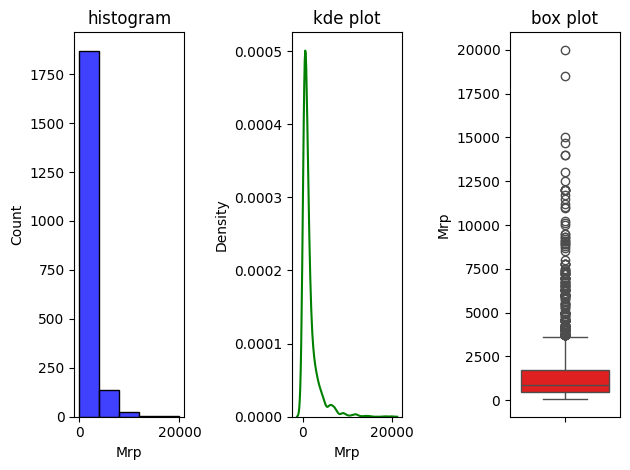

In [ ]:
visual_num_univariant(df["Mrp"])

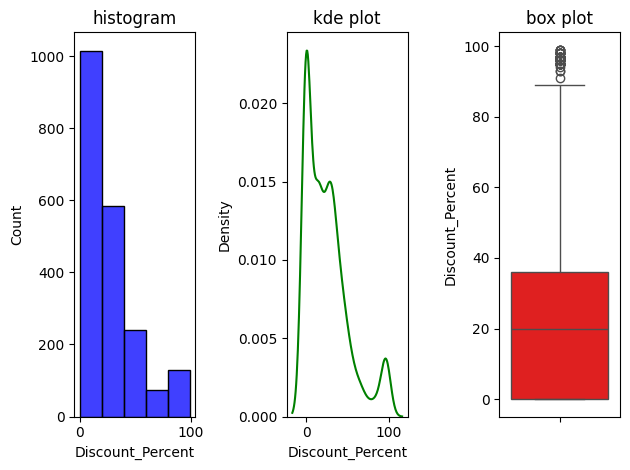

In [ ]:
visual_num_univariant(df["Discount_Percent"])

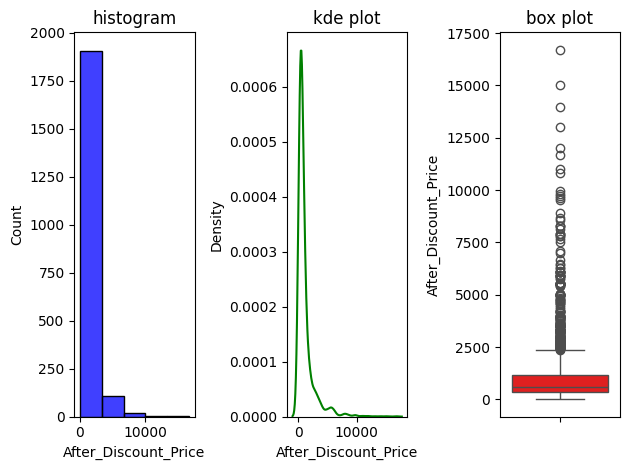

In [ ]:
visual_num_univariant(df["After_Discount_Price"])

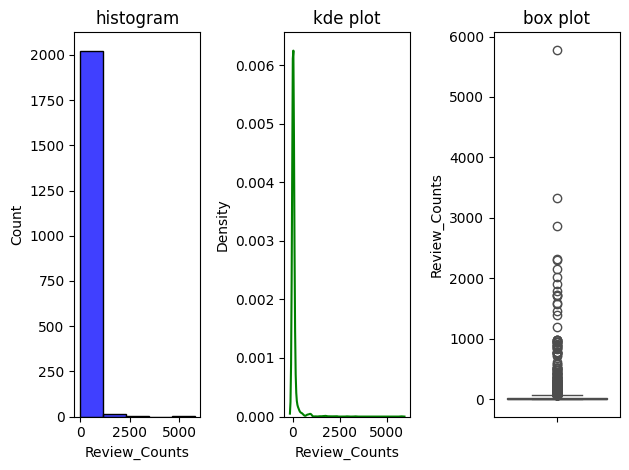

In [ ]:
visual_num_univariant(df["Review_Counts"])

Univariate Analysis for Categorical columns

<Axes: xlabel='count', ylabel='Title'>

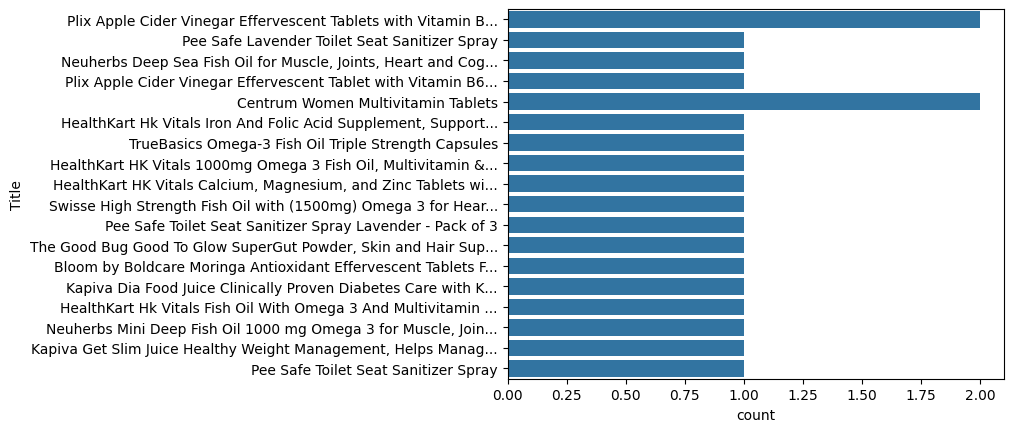

In [ ]:
sns.countplot(df["Title"].head(20))

<Axes: xlabel='count', ylabel='Brand'>

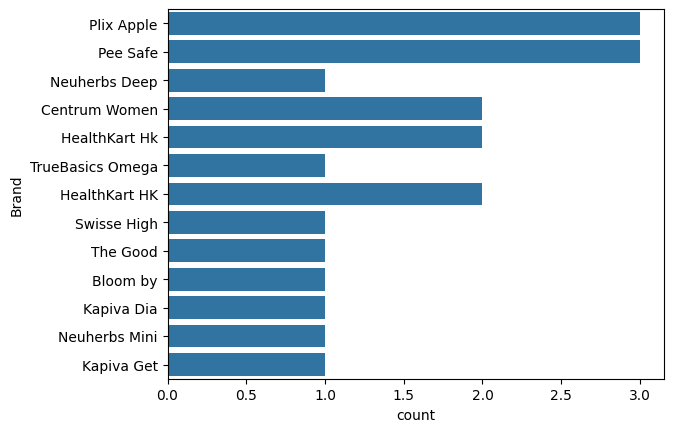

In [ ]:
sns.countplot(df["Brand"].head(20))

/tmp/ipython-input-70-4081881336.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Category"],palette = 'flare')


<Axes: xlabel='count', ylabel='Category'>

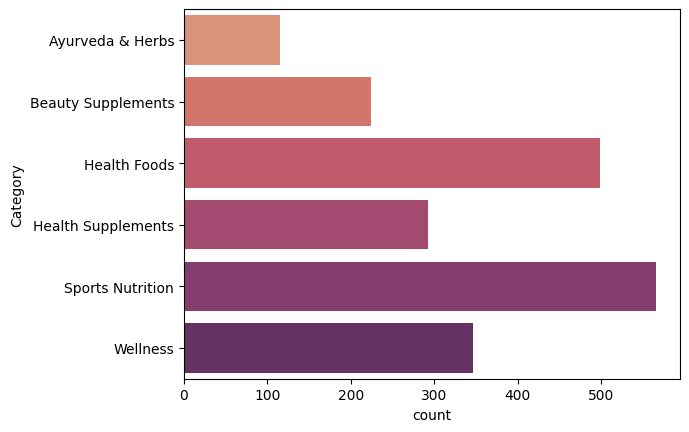

In [ ]:
sns.countplot(df["Category"],palette = 'flare')

<Axes: xlabel='count', ylabel='Sub_Category'>

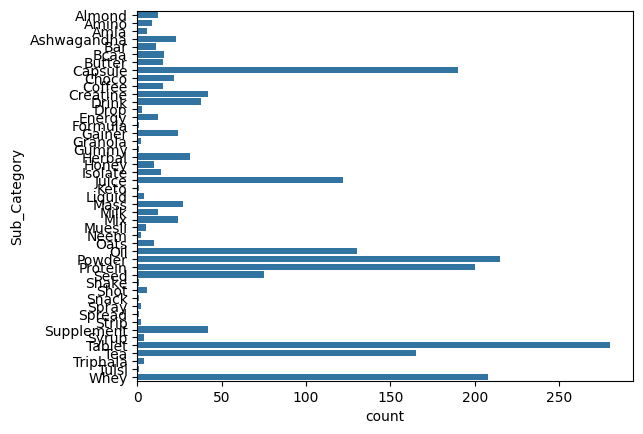

In [ ]:
sns.countplot(df["Sub_Category"])

<Axes: xlabel='count', ylabel='Gift'>

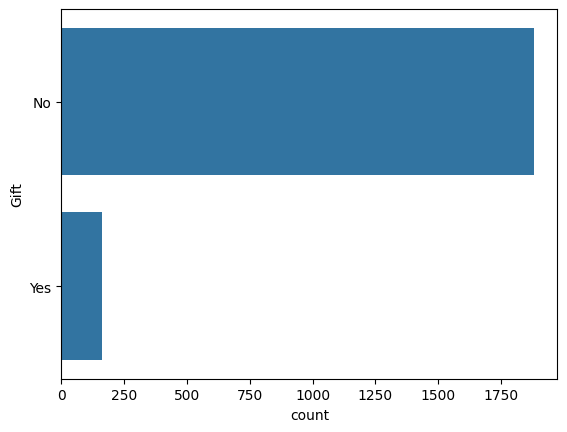

In [ ]:
sns.countplot(df["Gift"])

<Axes: xlabel='count', ylabel='Bestseller'>

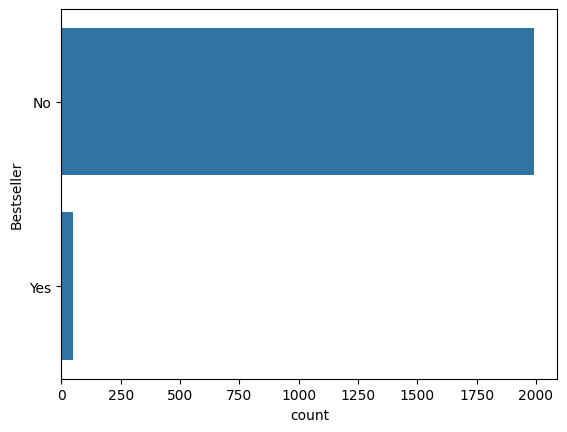

In [ ]:
sns.countplot(df["Bestseller"])

**Outlier Reduction**

In [ ]:
df["log_Mrp"]=np.log(df["Mrp"])

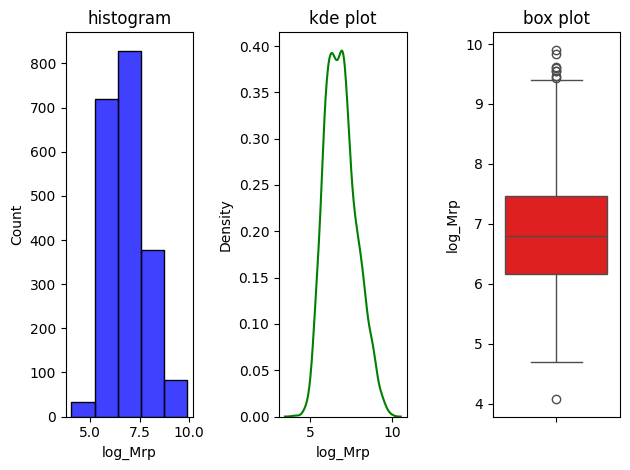

In [ ]:
visual_num_univariant(df["log_Mrp"])

In [ ]:
df["log_Discount_Percent"]=np.log(df["Discount_Percent"])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


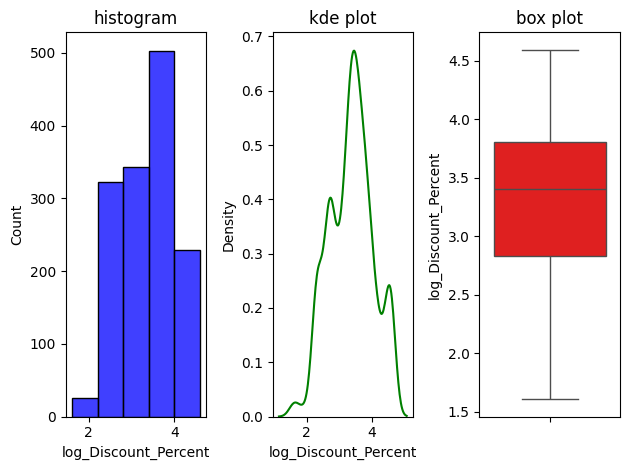

In [ ]:
visual_num_univariant(df["log_Discount_Percent"])

In [ ]:
df["log_After_Discount_Price"]=np.log(df["After_Discount_Price"])

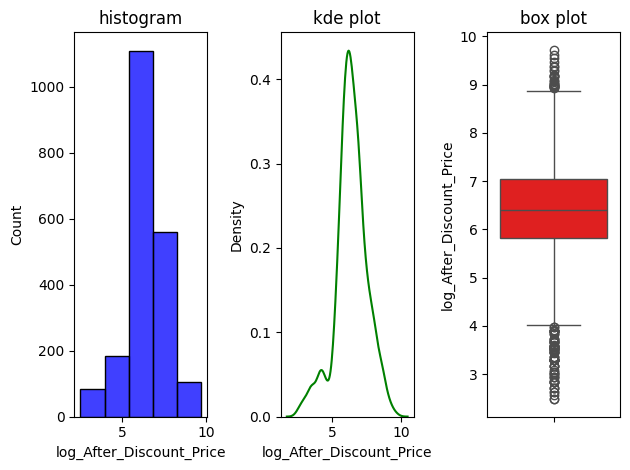

In [ ]:
visual_num_univariant(df["log_After_Discount_Price"])

In [ ]:
df["log_Review_Counts"]=np.log(df["Review_Counts"])

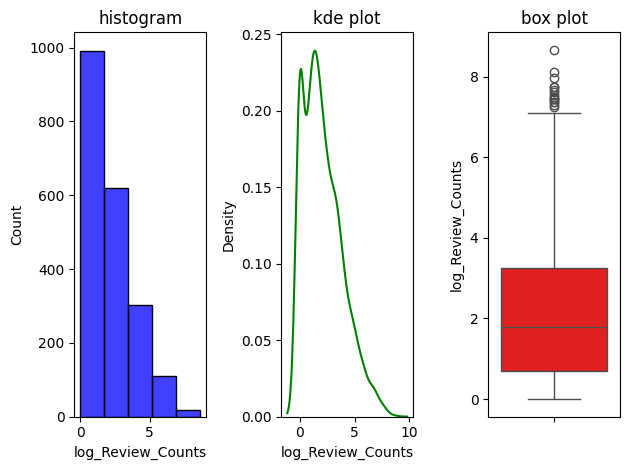

In [ ]:
visual_num_univariant(df["log_Review_Counts"])

In [ ]:
df.head(10)

,Title,Brand,Category,Sub_Category,Mrp,After_Discount_Price,Discount_Percent,Review_Counts,Gift,Bestseller,log_Mrp,log_Discount_Percent,log_After_Discount_Price,log_Review_Counts
0,Plix Apple Cider Vinegar Effervescent Tablets ...,Plix Apple,Wellness,Tablet,1400,999.0,29.0,488.0,Yes,Yes,7.244228,3.367296,6.906755,6.190315
1,Pee Safe Lavender Toilet Seat Sanitizer Spray,Pee Safe,Wellness,Oil,180,17.0,15.0,5781.0,Yes,Yes,5.192957,2.708050,2.833213,8.662332
2,"Neuherbs Deep Sea Fish Oil for Muscle, Joints,...",Neuherbs Deep,Wellness,Oil,1099,699.0,36.0,290.0,No,Yes,7.002156,3.583519,6.549651,5.669881
3,Plix Apple Cider Vinegar Effervescent Tablet w...,Plix Apple,Wellness,Tablet,350,299.0,15.0,208.0,Yes,Yes,5.857933,2.708050,5.700444,5.337538
4,Centrum Women Multivitamin Tablets,Centrum Women,Wellness,Tablet,770,693.0,10.0,19.0,No,Yes,6.646391,2.302585,6.541030,2.944439
5,HealthKart Hk Vitals Iron And Folic Acid Suppl...,HealthKart Hk,Wellness,Supplement,469,359.0,23.0,160.0,No,Yes,6.150603,3.135494,5.883322,5.075174
6,TrueBasics Omega-3 Fish Oil Triple Strength Ca...,TrueBasics Omega,Wellness,Oil,1998,1499.0,25.0,122.0,No,Yes,7.599902,3.218876,7.312553,4.804021
7,"HealthKart HK Vitals 1000mg Omega 3 Fish Oil, ...",HealthKart HK,Wellness,Oil,1507,999.0,34.0,58.0,No,No,7.317876,3.526361,6.906755,4.060443
8,"HealthKart HK Vitals Calcium, Magnesium, and Z...",HealthKart HK,Wellness,Tablet,699,415.0,41.0,230.0,No,No,6.549651,3.713572,6.028279,5.438079
9,Swisse High Strength Fish Oil with (1500mg) Om...,Swisse High,Wellness,Oil,1149,977.0,15.0,33.0,No,No,7.046647,2.708050,6.884487,3.496508


/tmp/ipython-input-83-973233745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


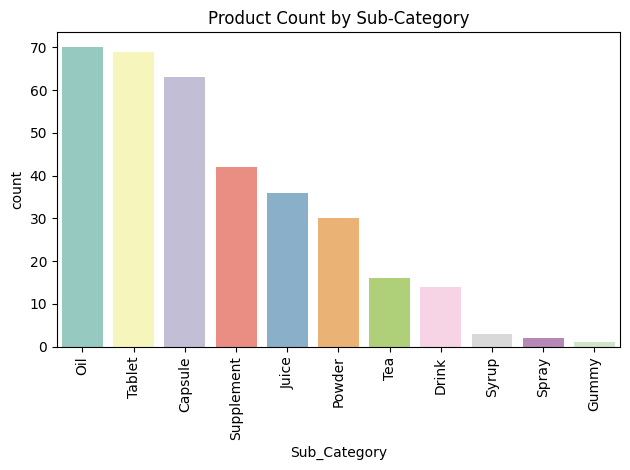

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_wellness[df_wellness['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='Set3')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Oil is the most common sub-category with over 60 plus products, significantly higher than others.

2.Sub-categories like Supplement,juice,powder fall in the mid-range (30–40 products).

3.Syrup,Spray are the least represented, each with fewer than 10 products.

/tmp/ipython-input-84-729017313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


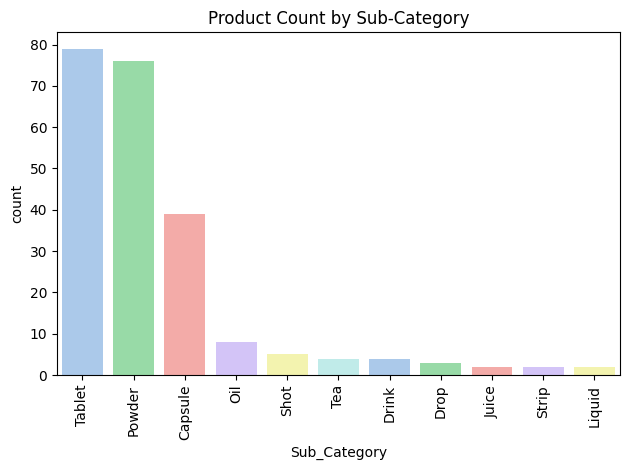

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_beauty_supplements[df_beauty_supplements['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='pastel6')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Tablet is the most common sub-category with over 80 products, significantly higher than others.

2.In this sub-category there is only Capsules that comes under mid-range with nearly 40 products

3.In beauty supplements there are more least represented products such as Tea,Shot,Drops,Juice..etc, each with fewer than 5 products.

/tmp/ipython-input-85-2753829480.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


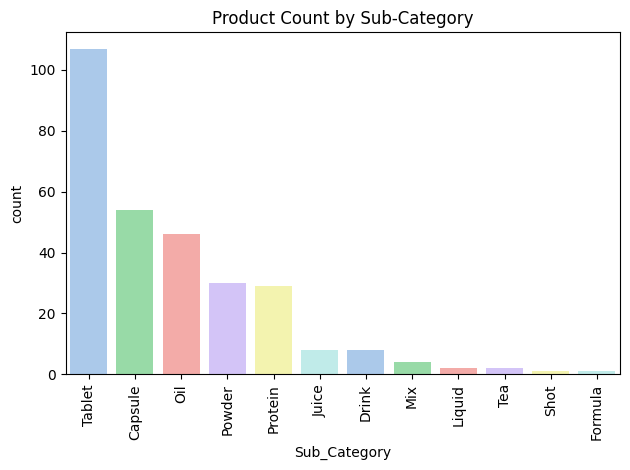

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_health_supplements[df_health_supplements['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='pastel6')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Tablet is the most common sub-category with over 100 plus products, significantly higher than others.

2.Sub-categories like Capsule,Oil fall in the mid-range (40-60 products).

3.Mix,Tea,Liquid..etc are the least represented, each with fewer than 20 products.

/tmp/ipython-input-86-3639818884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


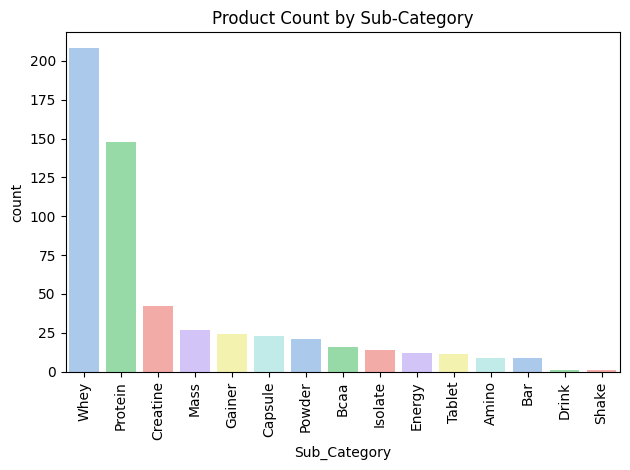

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_sports_nutrition[df_sports_nutrition['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='pastel6')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Whey is the most common sub-category with over 200 plus products, significantly higher than others.

2.There is no mid range products there are only products of either extreme high or low

3.Isolate,Bar,Drink..etc are the least represented, each with fewer than 25 products.

/tmp/ipython-input-87-2803078919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


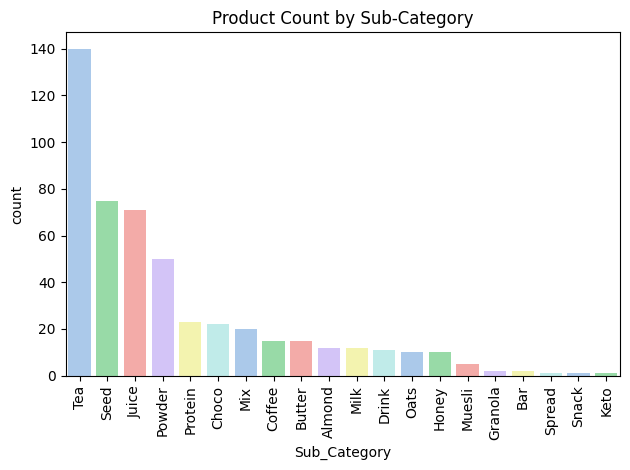

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_health_foods[df_health_foods['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='pastel6')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Tea is the most common sub-category with over 120 plus products, significantly higher than others.

2.Sub-categories like Seed,Juice fall in the mid-range (60-80 products).

3.Snack,Bar,Keto..etc are the least represented, each with fewer than 20 products.

/tmp/ipython-input-88-2682932875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


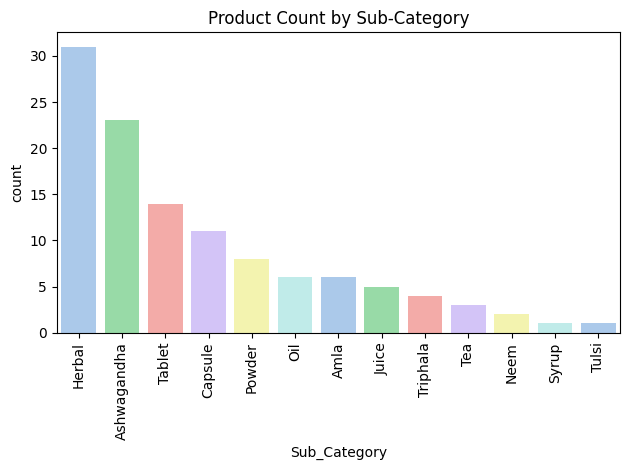

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
filtered_df = df_ayurveda[df_ayurveda['Sub_Category'] != 'Unknown']

# Re-plot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='pastel6')

plt.title("Product Count by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:

1.Herbal is the most common sub-category with over 80 plus products, significantly higher than others.

2.Sub-categories like Capsule,Ashwagandha,Tablet fall in the mid-range (40-60 products).

3.Neem,Tulsi,guggul..etc are the least represented, each with fewer than 20 products.

/tmp/ipython-input-89-3994437199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df,


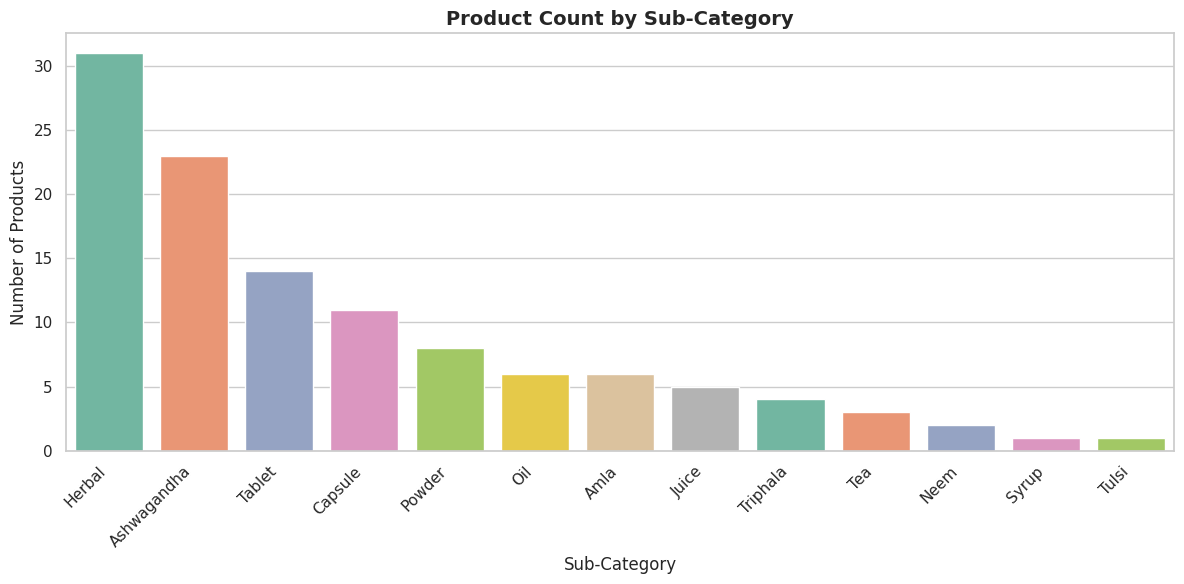

In [ ]:
# Remove "Unknown" from Sub_Category for plotting
# Set figure size and style
plt.figure(figsize=(12, 6))  # Wider layout for better spacing
sns.set(style="whitegrid")

# Clean and colorful countplot
sns.countplot(data=filtered_df,
              x='Sub_Category',
              order=filtered_df['Sub_Category'].value_counts().index,
              palette='Set2')

# Title and labels
plt.title("Product Count by Sub-Category", fontsize=14, fontweight='bold')
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Observation:
All Categories

1.Tablet is the most common sub-category with over 300 plus products, significantly higher than others.

2.Sub-categories like Capsule,Whey,Protein,Tea,Powder fall in the mid-range (150-200 products).

3.Keto,Strip,Snack,Shake..etc are the least represented, each with fewer than 25 products.

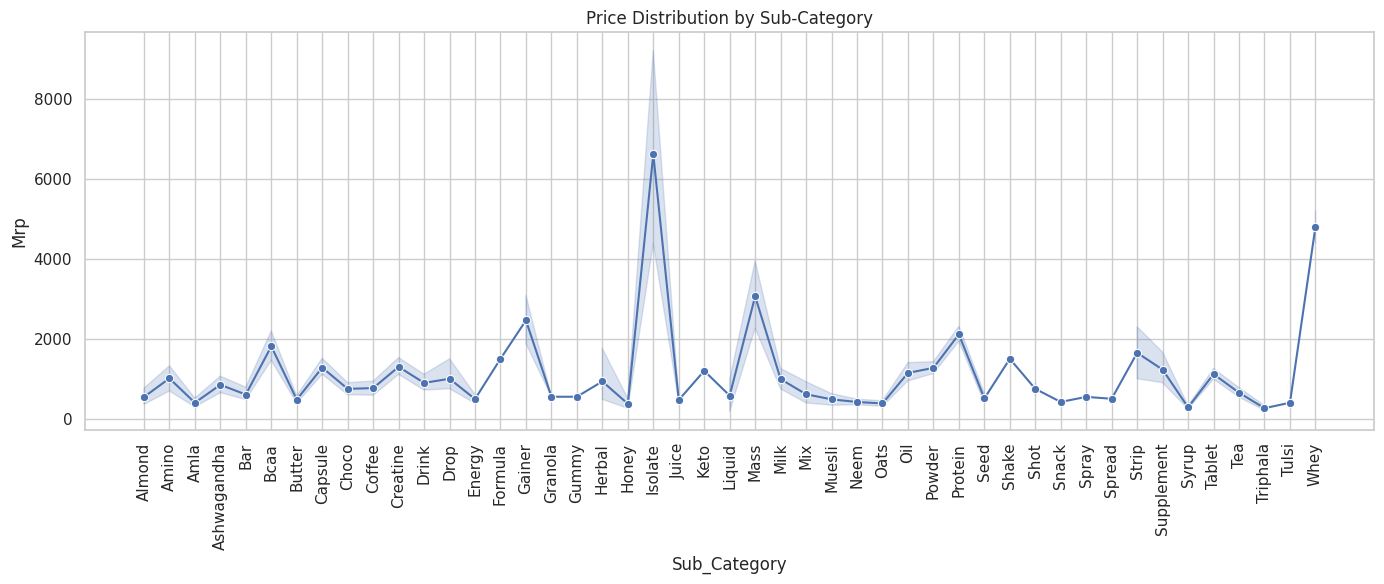

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Sub_Category', y='Mrp',marker="o")
plt.title("Price Distribution by Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

observation:

1.Most other sub-categories are priced under ₹2,000, indicating affordability across general product lines.

2.Sub-categories like Giloy,Muesli,Oats,Tulsi have relatively low average MRPs, generally under ₹500.

3.Isolate and Whey show high price peaks (above ₹8,000 and ₹4,000 respectively), likely due to bundled or specialized items.

/tmp/ipython-input-91-4173388403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Set2')


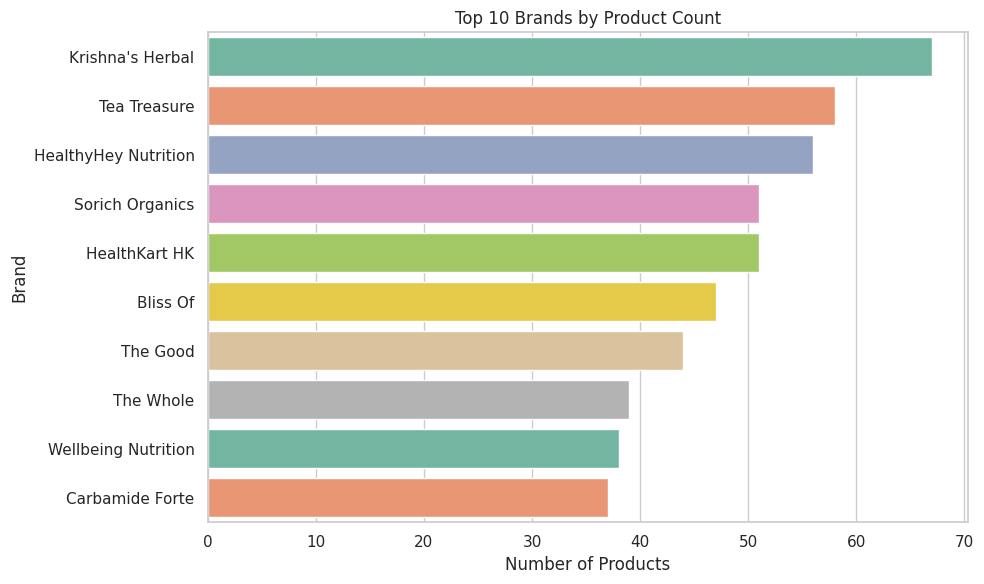

In [ ]:
top_brands = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Set2')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

observations:

1.Krishna's Herbal is the leading brand on Nykaa Health sector in terms of product count, with over 80 products.

2.All top 10 brands appear to focus heavily on natural and herbal formulations, indicating a trend or customer preference on the platform.

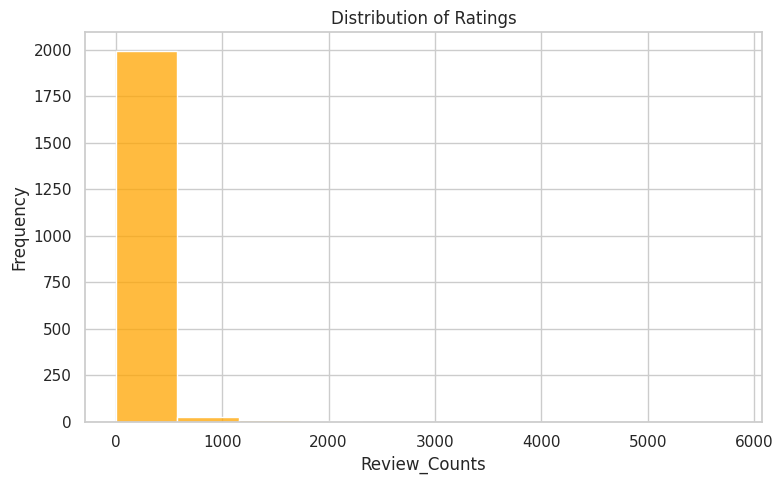

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Review_Counts'].dropna(), bins=10, kde=False, color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Review_Counts")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Observation:

1.The majority of products (over 2,000) have review counts below 50,000, indicating most items are moderately reviewed.

2.There are very few products with review counts above 1,000, and even fewer beyond 2,000, suggesting that only a handful of products go viral or receive very high engagement.

3.This pattern indicates that consumer attention is concentrated on a few popular products, while the rest receive relatively fewer interactions.

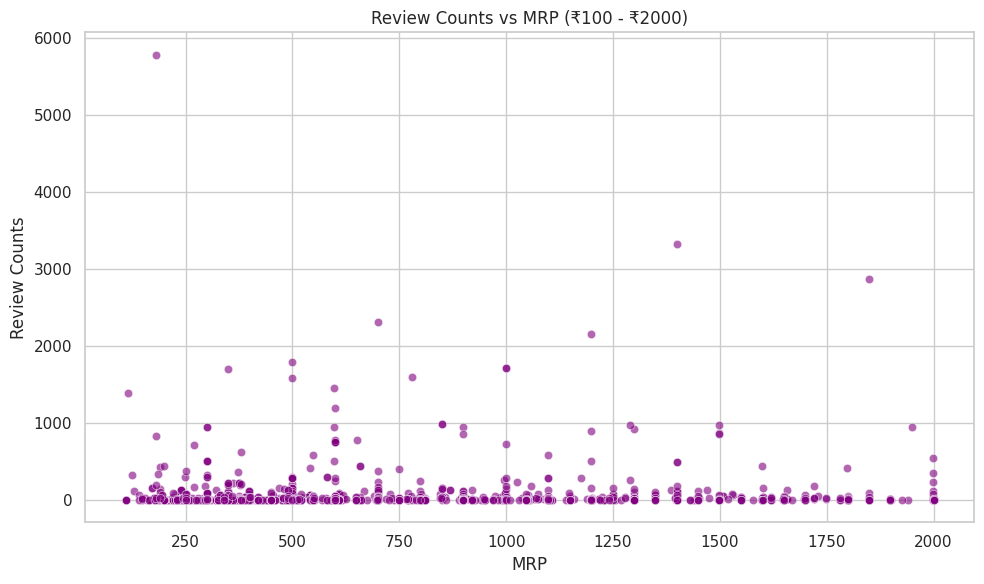

In [ ]:
# Step 1: Ensure numeric data
df['Mrp'] = pd.to_numeric(df['Mrp'], errors='coerce')
df['Review_Counts'] = pd.to_numeric(df['Review_Counts'], errors='coerce')

# Step 2: Filter MRP range
subset = df[(df['Mrp'] >= 100) & (df['Mrp'] <= 2000)]

# Step 3: Scatter Plot - Review Count vs MRP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='Mrp', y='Review_Counts', alpha=0.6, color='purple')
plt.title("Review Counts vs MRP (₹100 - ₹2000)")
plt.xlabel("MRP")
plt.ylabel("Review Counts")
plt.grid(True)
plt.tight_layout()
plt.show()


Observation:

1.Most products have low review counts, with a large cluster below 500 reviews across all price ranges.

2.No clear correlation is observed between MRP and review counts—high-priced products don't necessarily get more reviews.

3.A few products have very high review counts (above 1000), indicating potential outliers or popular items.

4.Products priced between ₹200 and ₹800 appear most frequently, suggesting they are the most common in the dataset.

5.The overall distribution suggests that factors beyond price, like brand or popularity, influence review counts.

/tmp/ipython-input-94-4096398542.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Brand', columns='Category', aggfunc='size', fill_value=0)


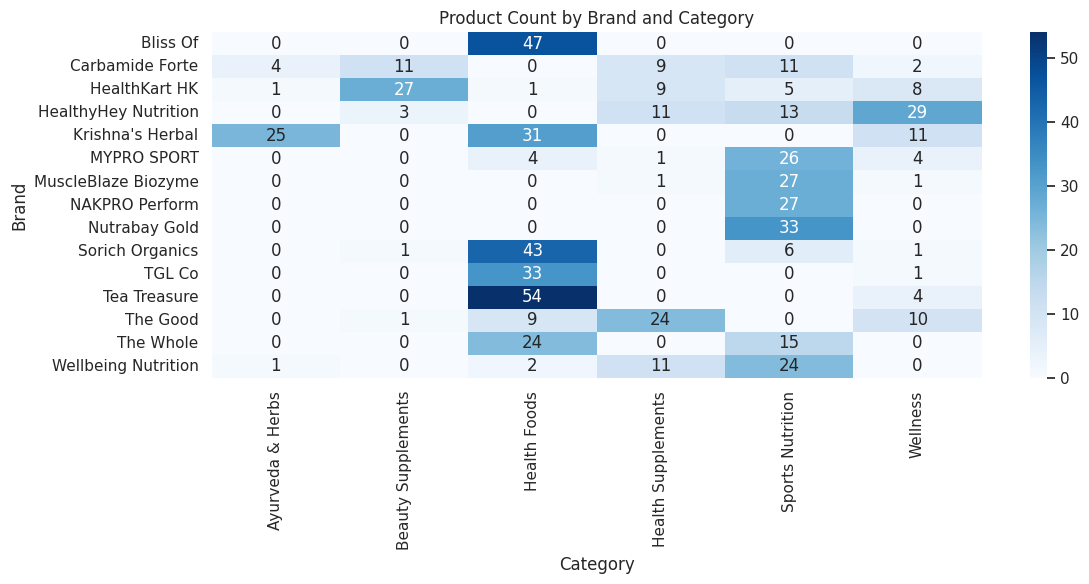

In [ ]:
pivot = df.pivot_table(index='Brand', columns='Category', aggfunc='size', fill_value=0)
top_brands = df['Brand'].value_counts().head(15).index
pivot = pivot.loc[pivot.index.intersection(top_brands)]
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Product Count by Brand and Category")
plt.tight_layout()
plt.show()

Observation:

1.Wellness

- HealthyHey Nutrition has the largest count (28), dominating the Wellness segment.

- HealthKart HK and Krishna's Herbal also contribute moderately (9 each).

- Most brands have little to no representation, showing a narrow market focus.

2.Beauty Supplements

- This category is sparsely populated, with only a few brands having products.

- HealthKart HK has the most with 29 products.

- Only 3-4 brands have any products at all, indicating low brand diversity.

3.Health Supplements

- The Good has the highest count with 22 products.

- HealthyHey Nutrition and Wellbeing Nutrition also contribute significantly (12 and 10 respectively).

- There’s a moderate spread of product counts across multiple brands.

4.Health Foods

- Tea Treasure dominates with 54 products, the highest in any category overall.

- Sorich Organics (45) and TGL Co (30) also have strong presence here.

- The category shows clear concentration among a few brands.

5.Sports Nutrition

- Nutrabay Gold leads with 30 products in this category.

- MuscleBlaze Biozyme and MYPRO SPORT follow closely with 27 products each.

- This category shows a specialized brand presence, with only a few brands participating.

6.Ayurveda & Herbs

- Krishna's Herbal leads with 46 products, dominating this category.

- Herbal Hills and HealthyHey Nutrition also have notable product counts (40 and 14 respectively).

- Most other brands have minimal or no presence in this category.






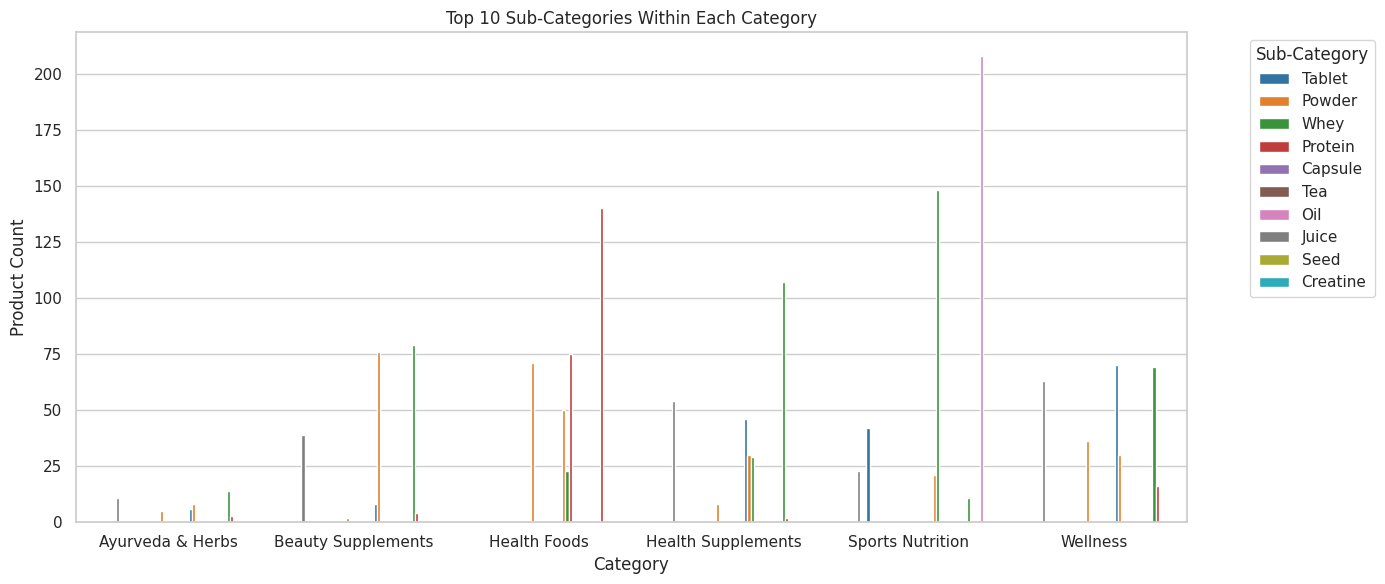

In [ ]:
# Step 1: Remove 'Unknown'
df = df[df['Sub_Category'] != 'Unknown']

# Step 2: Get top 10 Sub_Categories
top10_subcats = df['Sub_Category'].value_counts().nlargest(10).index

# Step 3: Filter df with only top 10 sub-categories
df_top10 = df[df['Sub_Category'].isin(top10_subcats)]

# Step 4: Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top10, x='Category', hue='Sub_Category', palette='tab10')
plt.title("Top 10 Sub-Categories Within Each Category")
plt.xlabel("Category")
plt.ylabel("Product Count")
plt.xticks(rotation=0)
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left', labels=top10_subcats)
plt.tight_layout()
plt.show()


Observations:

1.Ayurveda & Herbs:

- Tablet is the most dominant sub-category, with the highest product count in this category.

- Juice and Herbal sub-categories also have a significant presence.

2.Beauty Supplements:

- Whey and Protein are the top sub-categories in Beauty Supplements.

- Other sub-categories have minimal representation, suggesting low diversity.

3.Health Foods:

- Tea is the leading sub-category, followed by Whey and Tablet.

- This category shows a balanced spread across several sub-categories.

4.Health Supplements:

- Protein is the most dominant sub-category, followed by Powder.

- Sub-categories like Juice and Capsule also appear moderately.

5.Sports Nutrition:

- Seed stands out significantly, with the highest product count across all sub-categories.

- Protein and Whey also contribute, though much less than Seed.

6.Wellness:

- Powder and Protein lead in product count within this category.

- Sub-categories like Juice and Whey also have moderate presence.



/tmp/ipython-input-96-1062020193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive, x='Mrp', y='Title', palette='flare')


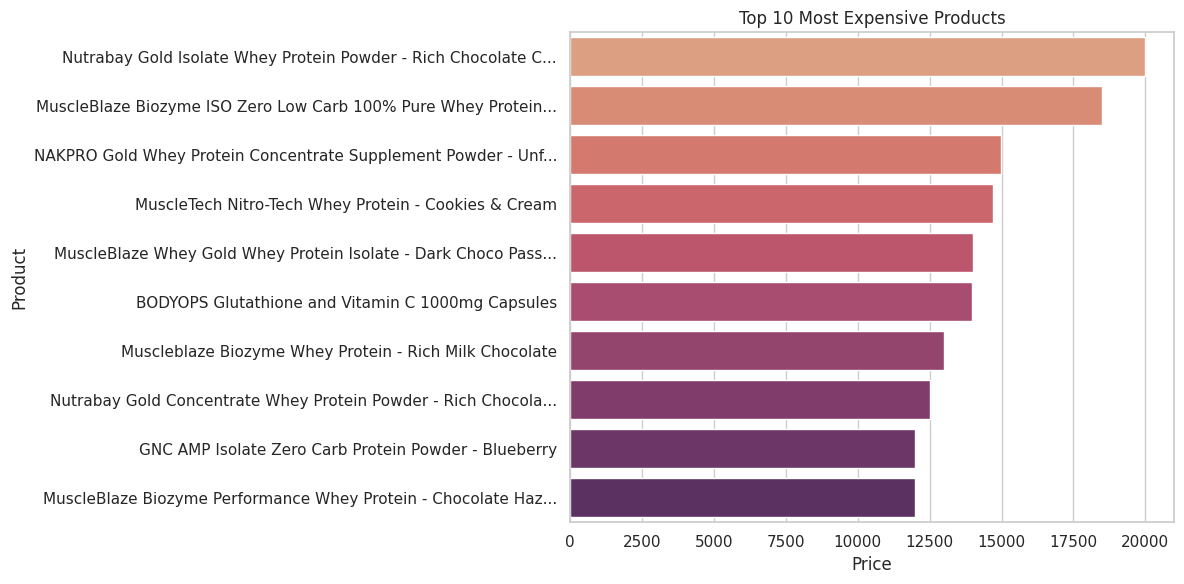

In [ ]:
top_expensive = df[['Title', 'Mrp']].dropna().sort_values(by='Mrp', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_expensive, x='Mrp', y='Title', palette='flare')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Price")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Observations:

- BSN Syntha-6 Protein Powder is by far the most expensive product, priced over ₹70,000 — significantly higher than the rest.

- Protein powders dominate the list, indicating that high-end supplements are generally premium-priced items.

- Multiple brands like MuscleBlaze, MuscleTech, and Nutrabay appear more than once, showing they offer several high-priced variants.



/tmp/ipython-input-97-457083385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_data = df.groupby('Category')['Review_Counts'].sum().sort_values()
/tmp/ipython-input-97-457083385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_data.values, y=review_data.index, palette='rocket')


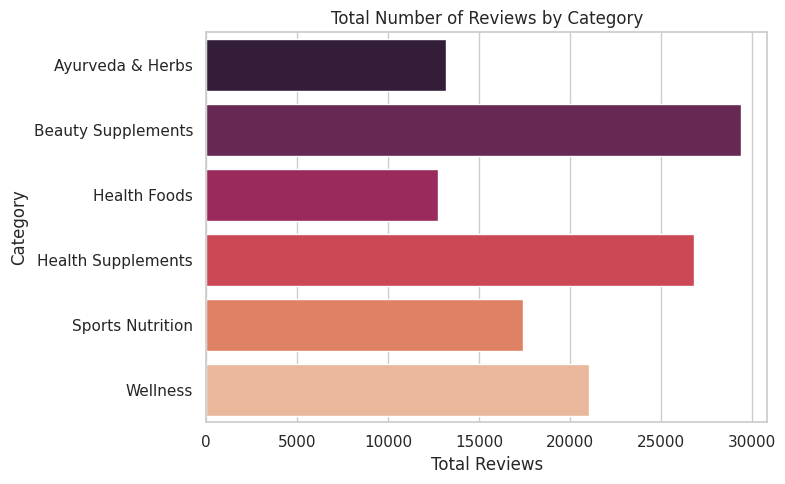

In [ ]:
review_data = df.groupby('Category')['Review_Counts'].sum().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=review_data.values, y=review_data.index, palette='rocket')
plt.title("Total Number of Reviews by Category")
plt.xlabel("Total Reviews")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

Observations:

- Beauty Supplements received the highest number of reviews, nearing 29,000, indicating strong customer engagement or popularity.

- Health Foods had the lowest total reviews among all categories, suggesting either lower visibility or fewer high-engagement products.

- Health Supplements and Wellness are close contenders with 25,000+ and 20,000+ reviews respectively, showing they are also major focus areas for consumers.

- Ayurveda & Herbs and Sports Nutrition have similar review volumes (~19,000–20,000), showing moderate but consistent customer interest.

- Despite being a functional and popular segment, Sports Nutrition has fewer reviews than Health and Beauty Supplements, which may suggest lower user feedback rate or fewer widely reviewed products.

/tmp/ipython-input-98-978049353.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_bestseller_idx = bestsellers.groupby('Category')['Review_Counts'].idxmax()


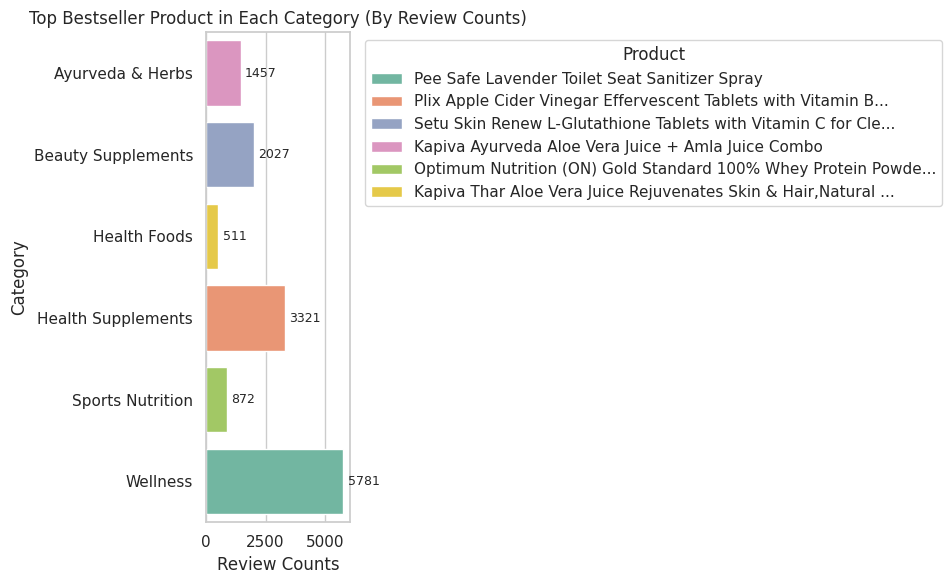

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper data types
df['Review_Counts'] = pd.to_numeric(df['Review_Counts'], errors='coerce').fillna(0)
df['Bestseller'] = df['Bestseller'].str.lower()

# Filter for bestseller products only
bestsellers = df[df['Bestseller'] == 'yes']

# Get index of top product per category based on review counts
top_bestseller_idx = bestsellers.groupby('Category')['Review_Counts'].idxmax()

# Select and display top products
top_bestseller_products = bestsellers.loc[top_bestseller_idx, ['Category', 'Title', 'Review_Counts']]
top_bestseller_products = top_bestseller_products.sort_values(by='Review_Counts', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_bestseller_products,
    y='Category',
    x='Review_Counts',
    hue='Title',
    dodge=False,
    palette='Set2'
)

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

# Customize plot
plt.title("Top Bestseller Product in Each Category (By Review Counts)")
plt.xlabel("Review Counts")
plt.ylabel("Category")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations:

- Wellness – The bestseller Pee Safe Lavender Toilet Seat Sanitizer Spray has the highest review count of 5,781 across all categories.

- Health Supplements – Plix Apple Cider Vinegar Effervescent Tablets is the top product with 3,319 reviews, ranking second overall.

- Beauty Supplements – Setu Skin Renew L-Glutathione Tablets received 2,026 reviews, showing strong customer interest.

- Ayurveda & Herbs – Kapiva Aloe Vera Juice + Amla Juice Combo has a moderate count of 1,454 reviews.

- Sports Nutrition – Optimum Nutrition (ON) Whey Protein Powder got 871 reviews, indicating popularity but lower engagement compared to others.

- Health Foods – The top product Kapiva Thar Aloe Vera Juice has the lowest review count of 510, suggesting limited customer traction.

**Count of each category which provides complementary gifts**

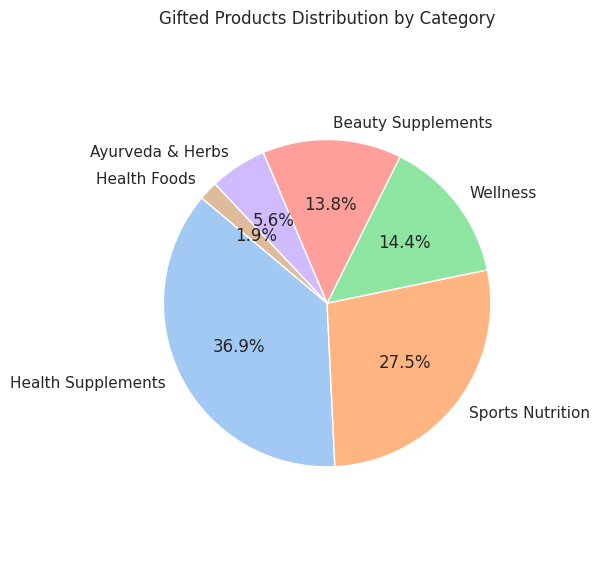

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter rows where Gift == 'Yes'
gifted = df[df['Gift'].str.lower() == 'yes']

# Step 2: Count how many gifted products exist per category
gift_counts = gifted['Category'].value_counts()

# Step 3: Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gift_counts,
    labels=gift_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title("Gifted Products Distribution by Category")
plt.axis('equal')  # Keeps pie chart circular
plt.tight_layout()
plt.show()


**Observations:**

- Health Supplements dominate the gifted category with 36.9% share.

- Sports Nutrition is the second most common gifted category at 27.5%.

- Beauty Supplements and Wellness also contribute notably, with 13.8% and 14.4%, respectively.

- Categories like Ayurveda & Herbs (5.6%) and Health Foods (1.9%) have a minimal presence in gifted options.

- The data indicates a strong consumer preference to gift health-focused products, especially supplements and nutrition aids.

/tmp/ipython-input-109-280319357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestseller_ratio = df[df['Bestseller'] == 'yes'].groupby('Sub_Category').size() / df_beauty_supplements.groupby('Sub_Category').size()
/tmp/ipython-input-109-280319357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bestseller_ratio.values, y=bestseller_ratio.index, palette='rocket')


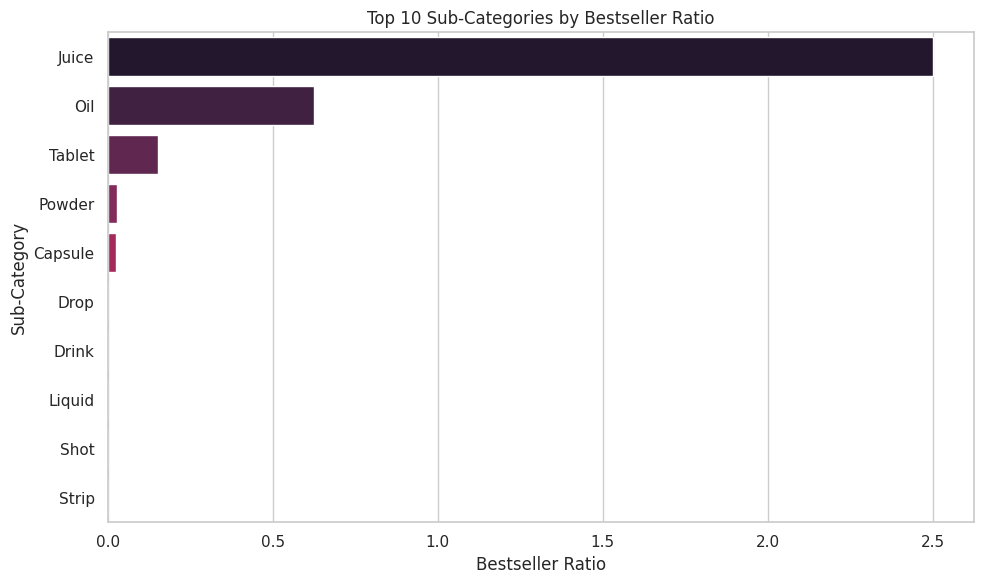

In [ ]:
bestseller_ratio = df[df['Bestseller'] == 'yes'].groupby('Sub_Category').size() / df_beauty_supplements.groupby('Sub_Category').size()
bestseller_ratio = bestseller_ratio.dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=bestseller_ratio.values, y=bestseller_ratio.index, palette='rocket')
plt.title("Top 10 Sub-Categories by Bestseller Ratio")
plt.xlabel("Bestseller Ratio")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

**Observations:**

- The Juice sub-category has the highest bestseller ratio, significantly outperforming all others. This indicates that a large proportion of juice products are marked as bestsellers compared to their total availability.

- Oil is the second-highest in terms of bestseller ratio, though with a considerably lower value than Juice. This suggests a relatively strong demand or popularity for oils, but not as pronounced.

- There's a sharp decline in bestseller ratio after Juice and Oil. Sub-categories like Tablet, Powder, and Capsule have much lower ratios, indicating that only a small fraction of products in these categories are considered bestsellers.


**MRP trend across Categories**

/tmp/ipython-input-111-3151338696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y='Mrp', inner=None, palette='Pastel1')


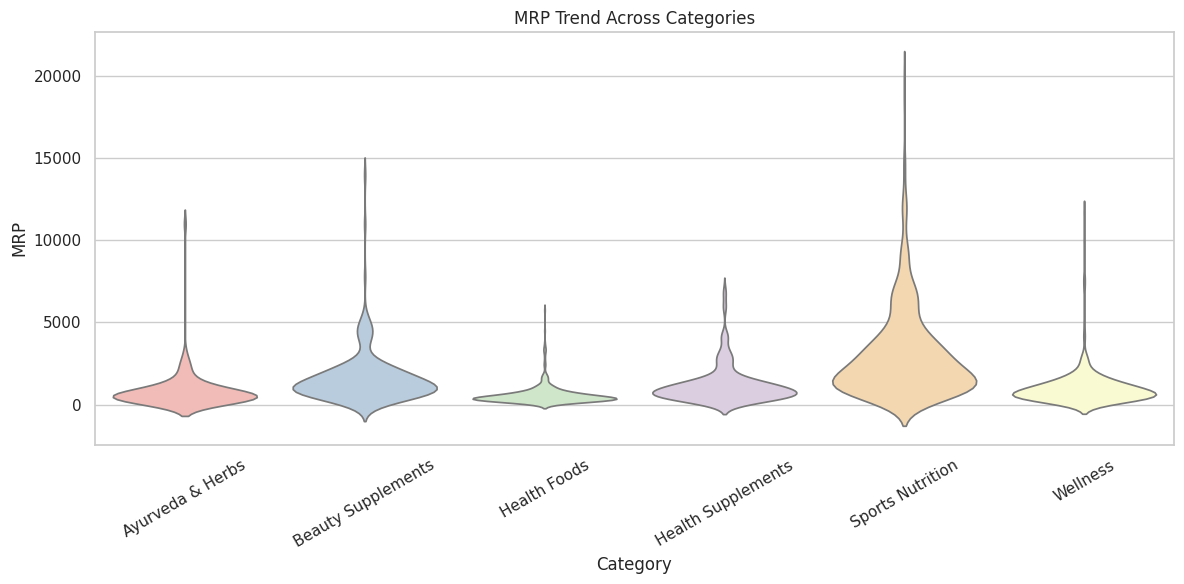

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Category', y='Mrp', inner=None, palette='Pastel1')
#sns.stripplot(data=df, x='Category', y='Mrp', color='black', size=3, alpha=0.3)
plt.title("MRP Trend Across Categories")
plt.ylabel("MRP")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Observations:**

**1.Sports Nutrition Shows the Widest Price Range**

- The Sports Nutrition category displays the widest spread of MRPs, with some products priced as high as ₹20,000+.

- This suggests that Sports Nutrition products have the most premium-priced items and greater pricing variability.

**2.Health Foods and Ayurveda Are Relatively Lower Priced**

- Categories like Health Foods and Ayurveda & Herbs show tight, dense distributions near the lower price range, indicating more affordable products.

**3.Beauty Supplements & Wellness Have Price Outliers**

- Beauty Supplements and Wellness have some notable high-end outliers, though most products still cluster around moderate prices (₹500–₹1500 range).

- These outliers can skew average price perceptions and may represent niche or luxury items.

**How has MRP changed over the time for top 10 popular products**

/tmp/ipython-input-113-2079334596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brand, x='Brand', y='Mrp', palette='Set3',showfliers=False)


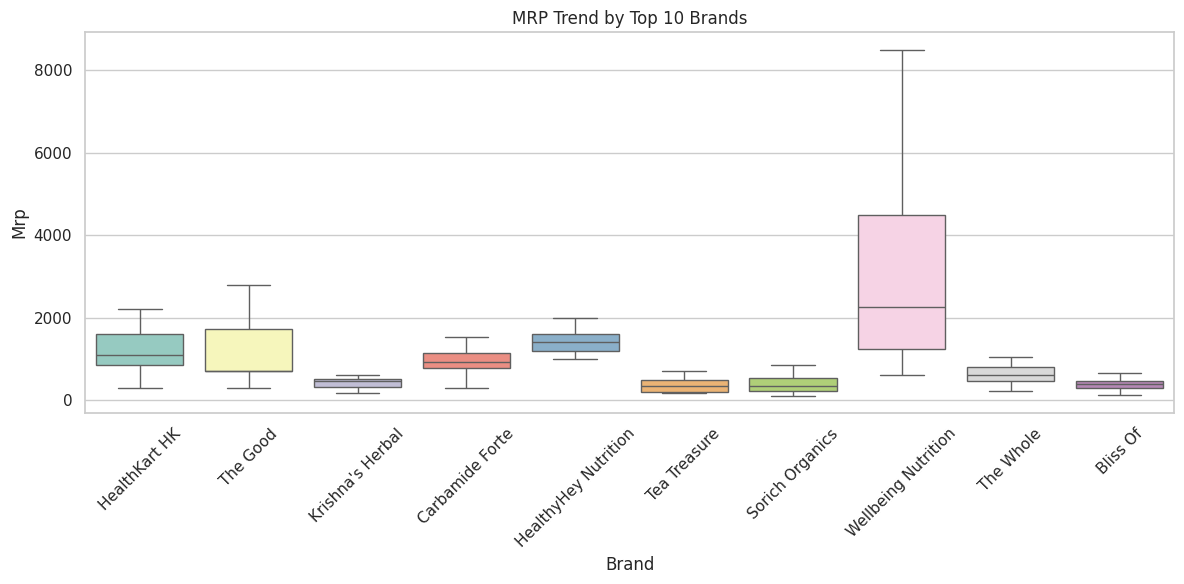

In [ ]:
top_brands = df['Brand'].value_counts().head(10).index
df_brand = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_brand, x='Brand', y='Mrp', palette='Set3',showfliers=False)
plt.title("MRP Trend by Top 10 Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

**1.Wellbeing Nutrition Has the Widest MRP Range**

- This brand displays the widest range of MRPs, extending beyond ₹8000.

- Indicates presence of both affordable and premium products under the same brand umbrella.

- The interquartile range (IQR) is also large, meaning prices vary a lot even among common products.

**2.HealthKart HK and The Good Offer Mid-High Range Products**

- These two brands have median MRPs above ₹1000, and moderate spreads.

- Suitable for customers seeking quality but not ultra-premium products.

**3.Krishna’s Herbal, The Whole, and Bliss Of: Affordable Segment**

- These brands exhibit tight IQRs and low maximum values, indicating more consistent and budget-friendly pricing.

- Minimal outliers, suggesting less variation in product pricing.

**4.HealthyHey Nutrition & Carbamide Forte Show Controlled Spread**

- Both brands have a moderate spread, with most products ranging between ₹1000–₹2000.

- This suggests a focus on mid-tier pricing, perhaps targeting a broad user base.

**5.Tea Treasure and Sorich Organics: Narrow Distribution**

- These two brands have a narrow price range with all products mostly under ₹1000.

- Ideal for consumers seeking low-cost or niche products.